Author: Prabin

## Numpy Introduction:
In Python, variables are dynamic and can hold different types of values, leading to a flexible but memory-inefficient structure. Each element in a Python list is a full Python object, containing type information, reference count, and the value itself. This can lead to significant memory overhead, especially when dealing with large homogeneous datasets.

NumPy addresses this by storing all data in contiguous blocks of memory, ensuring that only the raw data is stored without additional overhead.

Unlike` list`, Numpy array cannot store heterogeneous data structures. It provides a high-performance multidimensional array object and tools for working with these arrays as well as enables performing complex mathematical operations on them, including support for linear algebra, Fourier transformation, and random number generation.

### Installing and Importing Numpy:
Installing: pip install numpy

Importing: import numpy

The general convention when using NumPy is to use the alias `np`. So the import process usually looks like:
`import numpy as np`

In [130]:
pip install numpy

In [131]:
import numpy as np

### Array Creation: Writing elements of the array manually
Lets create a list and then convert the list into an array. The elements of the list (or array) are specified manually here.

In [132]:
my_first_list = [1,2,3]
my_first_array = np.array(my_first_list)

print("The list is:",my_first_list)
print("The array is:", my_first_array)

The list is: [1, 2, 3]
The array is: [1 2 3]


Lets create another longer list, and a 2d array with same elements. The 'view' of the list can be compared with that of a 2d array.

In [133]:
my_list = [1,2,3,4,5,6]
my_array = np.array([[1,2,3],[4,5,6]])

print("The list is:",my_list)
print("The array is:\n", my_array)

The list is: [1, 2, 3, 4, 5, 6]
The array is:
 [[1 2 3]
 [4 5 6]]


### Understanding the Memory layout of an array

1.  The flags attribute of an array returns a set of boolean flags for the array. These flags provide information about the memory layout of the array. For example, it indicates if the array is contiguous in memory (C_CONTIGUOUS or F_CONTIGUOUS), if it is writable (WRITEABLE), etc.
2. ndim attribute returns the dimensions of the array
3. data attribute returns a buffer object pointing to the start of the array’s data. It's mainly used internally and is not often needed for most operations.
4. itemsize attribute returns the length of 1 array element in bytes
5. Strides attribute returns a tuple of bytes to step in each dimension when traversing an array. Each int64 element takes 8 bytes of memory. Stride means the number of steps to move to another row (or column).
Here, 24 bytes is the stride to move from 1st row to the 2nd. Similary, to move from 1st column to the 2nd, 8 bytes of memory is skipped.

In [134]:
print(my_array.flags, "\n")
print(my_array.ndim, "\n")
print(my_array.data, "\n")
print(my_array.itemsize, "\n")
print(my_array.strides, "\n")

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
 

2 


8 

(24, 8) 



### NumPy's Superiority:
The main benefits of using NumPy arrays is smaller memory consumption and better runtime behaviour.

The `%timeit` magic command in IPython (or Jupyter Notebook) is used to measure the execution time of a single line of code multiple times to get an average runtime. It runs the code several times and reports the best, average, and standard deviation of the timings, providing a reliable measure of how long the operation takes.

In the provided code, we compare the time it takes to square each element in a Python list versus a NumPy array. Lets check the difference in time taken between them.

In [135]:
import time

In [136]:
print(my_first_list)
print(my_first_array)

[1, 2, 3]
[1 2 3]


In [187]:
# list comprehension to square each element in the Python list
%timeit [i**2 for i in my_first_list]

873 ns ± 10.4 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [188]:
# squares each element in the NumPy array
%timeit my_first_array**2

512 ns ± 8.54 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


### Datatypes in Numpy
The standard data types in NumPy are listed below:

![](https://docs.google.com/uc?export=download&id=1JeaEjsRRSrWDLIXL4jwO3BLiiKT9gpVp)

Source Table: https://jakevdp.github.io/PythonDataScienceHandbook/02.01-understanding-data-types.html

In [139]:
print(type(my_list))
print(type(my_array))
print(my_array.dtype)    # datatype of elements in the array
print(my_array.shape)    # shape of the nd array

<class 'list'>
<class 'numpy.ndarray'>
int64
(2, 3)


Lets check the datatype for an array with string elements.

Here, <U2 means "Unicode string of length 2",  U indicates Unicode, and 2 is the maximum length of the string.
The < indicates little-endian (byte order).

In [140]:
string_array = np.array(['ad','bd','cd'])
print("Information about the datatype of elements in the array is:", string_array.dtype)
print("The actual data type of the element is:",string_array.dtype.type)

Information about the datatype of elements in the array is: <U2
The actual data type of the element is: <class 'numpy.str_'>


### Operations in Arrays

In [141]:
# Convert an array to a nested Python list
print(my_array.tolist())

[[1, 2, 3], [4, 5, 6]]


In [142]:
# Transpose of the array
print(my_array.T, "\n")

[[1 4]
 [2 5]
 [3 6]] 



In [143]:
# Real part of the array
print(my_array.real, "\n")

# Imaginary part of the array
print(my_array.imag, "\n")

[[1 2 3]
 [4 5 6]] 

[[0 0 0]
 [0 0 0]] 



In [144]:
# Copying one array to another
copied_array = np.copy(my_array)
print(copied_array, "\n")

[[1 2 3]
 [4 5 6]] 



In [145]:
#Filling an array with specified value
copied_array.fill(0)
print(copied_array)

[[0 0 0]
 [0 0 0]]


#### Reshaping:

In NumPy, reshaping an array means changing its dimensions while preserving the total number of elements. This operation is particularly useful for manipulating array layouts to suit specific requirements.

In [146]:
# Reshaping the area changes the view of the array

reshaped_array1 = my_array.reshape(6,)   # 1d array, 6 elements
print(reshaped_array1, "\n_______\n")

reshaped_array2 = my_array.reshape(1,6)   # 2d array, 1 row 6 columns
print(reshaped_array2,"\n________\n")

reshaped_array3 = my_array.reshape(6,1)   # 2d array, 6 rows 1 column
print(reshaped_array3,"\n________\n")

reshaped_array4 = my_array.reshape(3,2)    # 2d array, 3 rows 2 columns
print(reshaped_array4,"\n________\n")


[1 2 3 4 5 6] 
_______

[[1 2 3 4 5 6]] 
________

[[1]
 [2]
 [3]
 [4]
 [5]
 [6]] 
________

[[1 2]
 [3 4]
 [5 6]] 
________



In [147]:
my_array.flatten()      # returns a copy of 1d array

array([1, 2, 3, 4, 5, 6])

In [148]:
# Ravelling creates a contiguous falttened array
print(my_array, "\n")
print(np.ravel(my_array))

[[1 2 3]
 [4 5 6]] 

[1 2 3 4 5 6]


#### Resizing:
* Unlike reshape or flatten, resize can change the array's actual data size. If the resized array has larger shape, the array is padded with 0
* Only contiguous arrays can be resized
* Resize doesn't work for an array that references or is referenced.  If there are multiple arrays sharing the same underlying data (like views or slices of the original array), resizing one of these arrays can potentially affect the integrity of the others. To avoid unintended consequences, NumPy restricts resizing for such arrays.

In [149]:
new_array = np.copy(my_array)
print(new_array,"\n")
new_array.resize((3,2), refcheck = True)   # checks for reference and raises error if set to True (which is default)
print(new_array)

[[1 2 3]
 [4 5 6]] 

[[1 2]
 [3 4]
 [5 6]]


In [150]:
# Array Clipping = all smaller values will at least be set to min, and all greater values will at most be set to max.

clipped_array = my_array.clip(2, 5)
print("Clipped array with min=2 and max=5:")
print(clipped_array)

Clipped array with min=2 and max=5:
[[2 2 3]
 [4 5 5]]


In [151]:
cummulative_sum = my_array.cumsum(1)    # return the cummulative sum along the axis
print(cummulative_sum,"\n")

cummulative_product = my_array.cumprod(1)    # return the cummulative product along the axis
print(cummulative_product)

[[ 1  3  6]
 [ 4  9 15]] 

[[  1   2   6]
 [  4  20 120]]


In [152]:
# Generate a series in a range
series = np.arange(1,15,3)
print("The series of numbers 3 space apart:", series, "\n")

# Generate a series with linearly spaced values in a range
series_values = np.linspace(0,1,5)
print("The series with linearly spaced values:", series_values)

The series of numbers 3 space apart: [ 1  4  7 10 13] 

The series with linearly spaced values: [0.   0.25 0.5  0.75 1.  ]


#### Dump and Load methods:
 NumPy provides a convenient way to save and load arrays using the 'dump' and 'load' methods, which leverage Python's pickle module for serialization. This is particularly useful for storing arrays to disk and reloading them later.

In [153]:
# Dumping and reading the array as a 'saved.pkl' file

my_array.dump('saved.pkl')   #dumping
read_array = np.load('saved.pkl', allow_pickle = True)
print(read_array)

[[1 2 3]
 [4 5 6]]


### Random Number Generation
NumPy offers generating random numbers from a wide variety of probability distribution. The process of generating random numbers involves sampling from these distributions according to their respective probability density functions (PDFs). It implements efficient algorithms for generating random samples that approximate the desired distribution. NumPy's random number generation capabilities are essential for Monte Carlo simulations, statistical modeling, and hypothesis testing.

Types of Random Numbers:
* Floating-Point Numbers:

  * np.random.rand: Generates random samples from a uniform distribution over [0, 1).
  * np.random.randn: Generates random samples from a standard normal distribution (mean=0, std=1).
  * np.random.uniform: Generates random samples from a uniform distribution over a specified range.
  * np.random.normal: Generates random samples from a normal (Gaussian) distribution.

* Integers:

  * np.random.randint: Generates random integers from a discrete uniform distribution over a specified range.
  * np.random.choice: Generates random samples from a given 1-D array.

In [154]:
random1 = np.random.rand(4)    # vector of 4 random numbers, range [0,1]
print(random1, "\n")

random2 = np.random.rand(4,4)   # 4x4 matrix of random numbers, range [0,1]
print(random2)

[0.96791069 0.51407631 0.26253591 0.78413433] 

[[0.89376694 0.11498181 0.45367407 0.27896988]
 [0.67475762 0.30539658 0.3397869  0.56348723]
 [0.104961   0.7487359  0.84228264 0.30790636]
 [0.02222726 0.87853039 0.61977571 0.2465825 ]]


In [155]:
random3 = np.random.randn(4)     # vector, numbers from standard normal distribution (0 mean, 1 std deviation)
print(random3, "\n")

random4 = np.random.randn(4,4)    # matrix, numbers from standard normal distribution
print(random4)

[ 1.5602247  -0.12683498 -0.29554169  0.47771825] 

[[ 0.99768803 -1.12562619  0.66351581  0.49445623]
 [-0.67761687  0.40968089 -0.6597723   0.44449313]
 [ 1.67648388 -0.38259141  0.47296147  0.54584235]
 [ 0.29487795 -0.31235519  2.31692159 -0.29386431]]


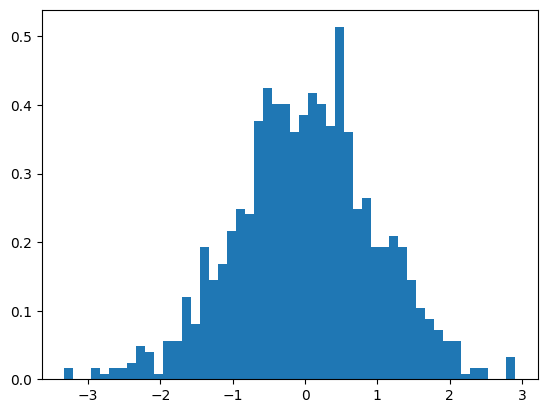

In [156]:
# Just like random3 above, Lets create a larger 1d array so that sample size increases and its easier to visualize.
# It should somewhat resemble the bell shape curve.
# Also matplotlib will not be discussed in this notebok, we will use to to plot if necessary

import matplotlib.pyplot as plt

larger_random3 = np.random.normal(0,1,1000)
plt.hist(larger_random3, bins = 50, density = True)
plt.show()

In [157]:
random5 = np.random.randint(5,10,8)      # vector of 8 elements, numbers range = [5,10]
print(random5,"\n")

random6 = np.random.randint(5,10,(4,4))   # matrix of order (4,4), numbers range = [5,10]
print(random6)

[5 6 8 5 9 6 8 9] 

[[6 9 7 6]
 [8 6 8 5]
 [9 8 9 5]
 [6 6 7 8]]


Note: `ri` is sometimes seen being used as an alias for numpy.random.randint in some code bases.

To use the alias, do the following first:

`from numpy.random import randint as ri`

### Indexing Operations
Indexing is the process of selecting specific elements from an array based on their positions (indices). Indexing arrays in NumPy allows you to access and manipulate individual elements or a subset of elements within an array.

NumPy provides several ways to index arrays:

  * Single Element Indexing: Access individual elements using their index.
  * Slicing: Access a range of elements using the start and end indices.
  * Boolean Indexing: Select elements based on a condition.
  * Fancy Indexing: Use arrays of indices to access multiple elements.



### Applications of Indexing

  * Data Analysis: Extract and manipulate subsets of data for analysis.
  * Machine Learning: Prepare datasets by selecting specific features or samples.
  * Image Processing: Access and modify pixel values in images.
  * Scientific Computing: Perform computations on specific parts of a dataset.

In [158]:
# Indexing an 1d array

my_vector = np.copy(random5)           # Recall from above that random5 is a vector of 8 elements
print("Array:",my_vector)

print("Element at 0th index is:", my_vector[0])
print("Elements from 3rd to 5th index are:", my_vector[3:6])
print("Elements up to 4th index are:", my_vector[:4])

Array: [5 6 8 5 9 6 8 9]
Element at 0th index is: 5
Elements from 3rd to 5th index are: [5 9 6]
Elements up to 4th index are: [5 6 8 5]


In [159]:
# Indexing a 2d array

my_matrix = np.copy(random6)          # Recall above that random6 is a 4x4 matrix
print(my_matrix, "\n")

print("Second row, all columns:", my_matrix[1,:])
print("All rows, 2nd column:", my_matrix[:,1])
print("Matrix with row indices 1 and 2 and column indices 3 and 4:\n", my_matrix[1:3,2:4])
print("Matrix with row indices 0 and 1 and column indices 1 and 3:\n", my_matrix[0:2,[1,3]])

[[6 9 7 6]
 [8 6 8 5]
 [9 8 9 5]
 [6 6 7 8]] 

Second row, all columns: [8 6 8 5]
All rows, 2nd column: [9 6 8 6]
Matrix with row indices 1 and 2 and column indices 3 and 4:
 [[8 5]
 [9 5]]
Matrix with row indices 0 and 1 and column indices 1 and 3:
 [[9 6]
 [6 5]]


In [160]:
#Return diagonal of the matrix
main_diagonal = np.diagonal(my_matrix)
print(my_matrix, "\n")
print("The main diagonal elements of the above matrix:", main_diagonal)

[[6 9 7 6]
 [8 6 8 5]
 [9 8 9 5]
 [6 6 7 8]] 

The main diagonal elements of the above matrix: [6 6 9 8]


In [161]:
# Conditional Subsetting
print("The elements greater than 5 in the matrix:\n", my_matrix>5, "\n")

print ("List of Elements greater than 5\n", my_matrix[my_matrix>5])

The elements greater than 5 in the matrix:
 [[ True  True  True  True]
 [ True  True  True False]
 [ True  True  True False]
 [ True  True  True  True]] 

List of Elements greater than 5
 [6 9 7 6 8 6 8 9 8 9 6 6 7 8]


### Broadcasting:
Broadcasting is simply a set of rules for applying binary universal functions (e.g. addition, subtraction, multiplication, etc.) on arrays of different sizes. For example, we can just add a scalar to the array. Broadcasting in NumPy allows arithmetic operations to be performed on arrays of different shapes. The smaller array is automatically expanded to match the shape of the larger array, enabling element-wise operations without explicitly reshaping the arrays.

* Key Points:

  * Automatic Expansion: Smaller array shapes are expanded to match the larger array shape during operations.
  * Compatible Shapes: Shapes are compatible if, starting from the trailing dimensions, the dimensions either match or one of them is 1.

* Rules of Broadcasting:

  Broadcasting in NumPy follows a strict set of rules to determine the interaction between the two arrays:

  - Rule 1: If the two arrays differ in their number of dimensions, the shape of the one with fewer dimensions is padded with ones on its leading (left) side.
  - Rule 2: If the shape of the two arrays does not match in any dimension, the array with shape equal to 1 in that dimension is stretched to match the other shape.
  - Rule 3: If in any dimension the sizes disagree and neither is equal to 1, an error is raised.

* Pros:

  * Memory Efficiency: Broadcasting avoids creating large intermediate arrays, saving memory.
  * Simplified Code: Operations can be performed without explicitly reshaping or replicating arrays, leading to cleaner and more readable code.

* Cons:

  * Potential for Errors: Misunderstanding broadcasting rules can lead to unexpected results or errors.
  * Inefficient Memory Use: In some cases, broadcasting can lead to temporary increased memory usage, especially when large arrays are involved.

Lets perform an addition operation between an 1d array and a 2d array

In [162]:
print(my_first_array,"\n")   # a 1d array
print(my_array,"\n")         # a 2d array

broadcasted_addition = my_first_array + my_array
print("Result of broadcasting(addition of 1d array with a 2d array):\n", broadcasted_addition)

[1 2 3] 

[[1 2 3]
 [4 5 6]] 

Result of broadcasting(addition of 1d array with a 2d array):
 [[2 4 6]
 [5 7 9]]


Lets perform a scalar multiplication of an 1d array. i.e. To multiply a scalar and an 1d array.

In [163]:
print(my_first_array,"\n")   # a 1d array
broadcasted_multiplication = my_first_array * 2
print("Result of broadcasting(multiplication by a scalar):\n", broadcasted_multiplication)

[1 2 3] 

Result of broadcasting(multiplication by a scalar):
 [2 4 6]


### Matrix Operations
Here various operations like multiplication, addition, subtraction, etc are covered.

In [164]:
# Lets define 2 square matrices a and b

a = np.array(
    [
        [1, 2],
        [3, 4]
    ]
)

b = np.array(
    [
        [5, 6],
        [7, 8]
    ]
)

In [165]:
# Matrix multiplication:
print(np.matmul(a, b), "\n")       # method 1
print(np.dot(a, b), "\n")          # method 2
print(a@b, "\n")                   # method 3

[[19 22]
 [43 50]] 

[[19 22]
 [43 50]] 

[[19 22]
 [43 50]] 



In [166]:
print("\nAddition:\n", a+b)
print("Element-wise Multiplication\n", a*b)
print("Element-wise division\n", a/b)
print("Lineaer combination: 3*a - 2*b\n", 3*a-2*b)


Addition:
 [[ 6  8]
 [10 12]]
Element-wise Multiplication
 [[ 5 12]
 [21 32]]
Element-wise division
 [[0.2        0.33333333]
 [0.42857143 0.5       ]]
Lineaer combination: 3*a - 2*b
 [[-7 -6]
 [-5 -4]]


In [167]:
a_percentile50 = np.percentile(a, 50)     # 50th percentile of matrix a
b_percentile50 = np.percentile(b, 50)     # 50th percentile of matrix b

a_percentile75 = np.percentile(a,75)      # 75th percentile of matrix a
b_percentile99 = np.percentile(b,99)      # 99th percentile of matrix b

print(a_percentile50)
print(b_percentile50)
print(a_percentile75)
print(b_percentile99)

2.5
6.5
3.25
7.97


#### argmin and argmax:
These are the in-built functions in NumPy. argmin returns the index of the smallest value in the array while argmax returns the index of the largest value in the array. These can be used in both single and multi-dimensional arrays.

In [168]:
print(my_first_array)
print("The max value is the index:",np.argmax(my_first_array))  # argmax in 1d array
print("The min value is the index:",np.argmin(my_first_array))  # argmin in 1d array

[1 2 3]
The max value is the index: 2
The min value is the index: 0


In [169]:
print(my_array)
print("The max value is the index:",np.argmax(my_array))    # argmax in 2d array
print("The min value is the index:",np.argmin(my_array))    # argmin in 2d array

[[1 2 3]
 [4 5 6]]
The max value is the index: 5
The min value is the index: 0


* When we pass an axis parameter to `argmax` method, the index of maximum value of that particular axis is returned.

In [170]:
print(my_array)
print("The max value in the axis = 0 (rows compared columnwise and the row's index returned):",np.argmax(my_array, axis = 0))
print("The min value in the axis = 0 (rows compared columnwise and the row's index returned):",np.argmin(my_array, axis = 0))

[[1 2 3]
 [4 5 6]]
The max value in the axis = 0 (rows compared columnwise and the row's index returned): [1 1 1]
The min value in the axis = 0 (rows compared columnwise and the row's index returned): [0 0 0]


* argmax: Here, 1st columnn is picked and when the rows are compared, the row's index (with highest number) is returned. For example, 1 and 4 is compared, index of 2nd row (1) is returned. Similarly other columns are picked, 1 is returned after comparision with 2 and 5, then 3 and 6
* argmin: 1st row has lowest values, so 0 is returned for all the columns

In [171]:
print(my_array)
print("The max value in the axis = 1 (columns compared rowwise and the column's index returned):",np.argmax(my_array, axis = 1))
print("The min value in the axis = 1 (columns compared rowwise and the column's index returned):",np.argmin(my_array, axis = 1))

[[1 2 3]
 [4 5 6]]
The max value in the axis = 1 (columns compared rowwise and the column's index returned): [2 2]
The min value in the axis = 1 (columns compared rowwise and the column's index returned): [0 0]


* argmax: First row is picked and The columns are compared. The 3rd column has highest values, so 2 is returned. Same for the 2nd row
* argmin: 1st column has lowest value, so 0 is returned.

### Stack:
`stack` method in numpy is used to join a sequence of arrays along a new axis. The axis parameter specifies the index of the new axis in the dimensions of the result. For example, if axis=0 it will be the first dimension and if axis=-1 it will be the last dimension.

In [172]:
x = np.array([1, 2, 3])
y = np.array([7, 8, 9])

In [173]:
print(np.stack((x,y)), "\n") #default value of axis is 0
print(np.stack((x,y), axis = 1)) #default value of axis is 0

[[1 2 3]
 [7 8 9]] 

[[1 7]
 [2 8]
 [3 9]]


### Splitting
`split` is used to split an array to more arrays.

The 2 kinds of splitting are done here:

* Splitting in equal frequencies: Divide the array into equal sized sub-arrays
* Splittng based on interval: Divide the array at specified indices. The indices can be choosen uniformly or non-uniformly.

In [174]:
z = np.arange(12)
print(z)

[ 0  1  2  3  4  5  6  7  8  9 10 11]


In [175]:
print(np.split(z, 3))        # 3 equal sized

# print(np.split(z,5))

[array([0, 1, 2, 3]), array([4, 5, 6, 7]), array([ 8,  9, 10, 11])]


Uncomment and run the 2nd line in the above cell. It should show an error, because array of size 12 can't be splitted into 5 equal sized sub-arrays.

Now in the cell below, lets split based on specified intervals. Here, the resulting sub-arrays should have non-uniform sizes. That's because, the interval specification is not uniform, resulting in the last sub-array to be significantly larger.

In [176]:
np.split(z, [3,5,7])

[array([0, 1, 2]), array([3, 4]), array([5, 6]), array([ 7,  8,  9, 10, 11])]

### Padding:
Padding in NumPy involves adding values to the edges of an array. This is often used in image processing, signal processing, and neural networks to manipulate the size of data without altering the original content.

Types of Padding:

  * Constant Padding: Adds a constant value to the edges.
  * Edge Padding: Repeats the edge values of the array.
  * Linear Ramp Padding: Adds a linear sequence of values to the edges.
  * Maximum Padding: Pads with the maximum value of the array.
  * Mean Padding: Pads with the mean value of the array.

In [177]:
new_array = [1, 2, 3, 4, 5]

1. Constant padding:
 Adds 2 elements with the value 4 at the beginning and 3 elements with the value 6 at the end of the array.

In [178]:
# constant padding
print(np.pad(new_array, (2, 3), 'constant', constant_values=(4, 6)))

[4 4 1 2 3 4 5 6 6 6]


2. Edge Padding: Repeats the edge values of the array, adding 2 elements with the first value at the beginning and 3 elements with the last value at the end.

In [179]:
# Edge padding
print(np.pad(new_array, (2, 3), 'edge'))

[1 1 1 2 3 4 5 5 5 5]


3. Linear Ramp Padding: Adds a linear sequence of values starting from 5 at the beginning and ending at -4 at the end.

In [180]:
# Linear ramp padding
print(np.pad(new_array, (2, 3), 'linear_ramp', end_values=(5, -4)))

[ 5  3  1  2  3  4  5  2 -1 -4]


4. Maximum Padding: Adds 2 elements with the maximum value of the array at the boundaries

In [181]:
# Maximum padding
print(np.pad(new_array, (2,), 'maximum'))

[5 5 1 2 3 4 5 5 5]


### Aggregation:
When faced with a large amount of data, we may need to compute typical summary statistics: mean, standard deviation, sum, product, median, minimum, maximum and so on. NumPy provides fast built-in aggregation functions for working on arrays.

In [182]:
print(my_array)

[[1 2 3]
 [4 5 6]]


In [183]:
print("Mean1: ", np.mean(my_array, axis=0)) # returns arithmetic mean of the rows (column-wise)
print("Mean2: ", np.mean(my_array, axis=1)) # returns arithmetic mean of the columns (row-ise)

Mean1:  [2.5 3.5 4.5]
Mean2:  [2. 5.]


In [184]:
print("Std: ", np.std(my_array))

Std:  1.707825127659933


In [185]:
#min and max of an array
print("Min: ", np.min(my_array))
print("Max: ", np.max(my_array))

Min:  1
Max:  6


In [186]:
# sum all the values in an array
print("Sum: ", np.sum(my_array))


Sum:  21


# Applications:

## [Optional Section]


There are various useful applications that relies heavily on NumPy functionalities. We won't be going in detail about these (since they will come later in the course) but they are briefly shown/implemented below:

## 1. Singular Value Decomposition (SVD):

  * Decomposes a matrix into orthogonal and diagonal components.
  * Useful for dimensionality reduction and understanding matrix properties.

In [192]:
# Generate a random matrix
A = np.random.randint(1, 10, 9).reshape(3, 3)
print("Original matrix:\n", A)

Original matrix:
 [[3 3 7]
 [7 2 2]
 [6 1 9]]


In [194]:
# Perform Singular Value Decomposition (SVD)
u, s, v = np.linalg.svd(A, full_matrices=True)

In [199]:
print("Left singular vectors (u):\n", u)
print("\nSingular values (s):\n", s)
print("\nRight singular vectors (v):\n", v)

Left singular vectors (u):
 [[-0.53263641  0.40584233 -0.74269136]
 [-0.42503476 -0.88711198 -0.17993828]
 [-0.73187698  0.21982796  0.64500524]]

Singular values (s):
 [14.66760883  4.78323258  1.99547926]

Right singular vectors (v):
 [[-0.61117081 -0.21679442 -0.76122954]
 [-0.76795118 -0.07042706  0.63662471]
 [ 0.19162784 -0.97367356  0.12344457]]


In [201]:
# Reconstruction of A using u, s, and v
reconstructed_A = np.dot(u, np.dot(np.diag(s), v))
print("Reconstruction of A, u*s*v:\n", reconstructed_A)

Reconstruction of A, u*s*v:
 [[3. 3. 7.]
 [7. 2. 2.]
 [6. 1. 9.]]


## 2. QR Decomposition:

  * Decomposes a matrix into an orthogonal matrix and an upper triangular matrix.
  * Useful for solving systems of linear equations and numerical stability.

In [204]:
# Generate a random matrix
B = np.random.randint(1, 10, 9).reshape(3, 3)
print("Original matrix:\n", B)

Original matrix:
 [[5 4 2]
 [3 5 5]
 [5 5 9]]


In [211]:
# Perform QR Decomposition
q, r = np.linalg.qr(B)

In [212]:
print("Orthogonal matrix (Q):\n", q)
print("\nUpper triangular matrix (R):\n", r)

Orthogonal matrix (Q):
 [[-0.65094455  0.48593737 -0.58321184]
 [-0.39056673 -0.87316872 -0.29160592]
 [-0.65094455  0.03796386  0.7581754 ]]

Upper triangular matrix (R):
 [[-7.68114575 -7.81133466 -9.11322377]
 [ 0.         -2.23227481 -3.05229413]
 [ 0.          0.          4.19912527]]


In [213]:
# Reconstruction of B using Q and R
reconstructed_B = np.dot(q, r)
print("Reconstruction of B, Q*R:\n", reconstructed_B)

Reconstruction of B, Q*R:
 [[5. 4. 2.]
 [3. 5. 5.]
 [5. 5. 9.]]


## 3. Eigenvalues and Eigenvectors:

  * Computes eigenvalues and eigenvectors of a square matrix.
  * Useful for understanding dynamic systems and transformations.

In [216]:
# Generate a random matrix
C = np.random.randn(9).reshape(3, 3)
print("Original matrix:\n", C)

Original matrix:
 [[ 0.57012463 -0.81661676  1.15612528]
 [-0.20910605 -1.27005581  1.40305255]
 [ 0.56524781  1.02764217 -0.19415843]]


In [217]:
# Compute Eigenvalues and Eigenvectors
w, v = np.linalg.eig(C)

In [218]:
print("Eigenvalues:\n", w)
print("\n")
print("Eigenvectors:\n", v)

Eigenvalues:
 [-2.28203218  1.10452196  0.28342061]


Eigenvectors:
 [[ 0.41764536  0.7975137  -0.58938571]
 [ 0.76531847  0.25329866  0.58372664]
 [-0.48975503  0.54755062  0.55846906]]


## 4. Linear Equation Solving:

  * Solves a system of linear equations using matrix inversion.
  * Useful for engineering and scientific computations.

You can directly solve linear system of equations using NumPy writing only one line of code.

Suppose you want to solve the following set of equations for (x,y,z). It is easy to see that (2,1,5) are the unique solutions.

2x + 5y + z = 14;

3x - 2y - z = -1;

x - 3y + z = 4

In [220]:
# Define matrix A and vector B
A = np.array([[2, 5, 1], [3, -2, -1], [1, -3, 1]])
B = np.array([14, -1, 4])

In [224]:
# Solve linear equations Ax = B
x = np.linalg.solve(A, B)
print("The solutions are:", x)

The solutions are: [2. 1. 5.]


## 5. Linear Regression Using Least Squares:

  * Performs linear regression to find the best-fit line for given data.
  * Useful for modeling relationships between variables and making predictions.

In [227]:
# Generate data points
x = np.arange(1, 11, 1)
y = 2 * x + np.random.randn(10) - 1

print(x, "\n")
print(y)

[ 1  2  3  4  5  6  7  8  9 10] 

[ 2.78175064  1.85892007  3.67318832  5.64116007  9.0011842   9.57387121
 12.59479267 14.6244551  17.70219707 18.55016615]


In [229]:
# Create matrix A for linear regression
A = np.vstack([x, np.ones(len(x))]).T
print(A)

[[ 1.  1.]
 [ 2.  1.]
 [ 3.  1.]
 [ 4.  1.]
 [ 5.  1.]
 [ 6.  1.]
 [ 7.  1.]
 [ 8.  1.]
 [ 9.  1.]
 [10.  1.]]


In [230]:
# Perform least squares regression
m, c = np.linalg.lstsq(A, y, rcond=None)[0]
print("Coefficient (slope):", m)
print("Intercept:", c)

Coefficient (slope): 1.9939914991985874
Intercept: -1.366784695333984


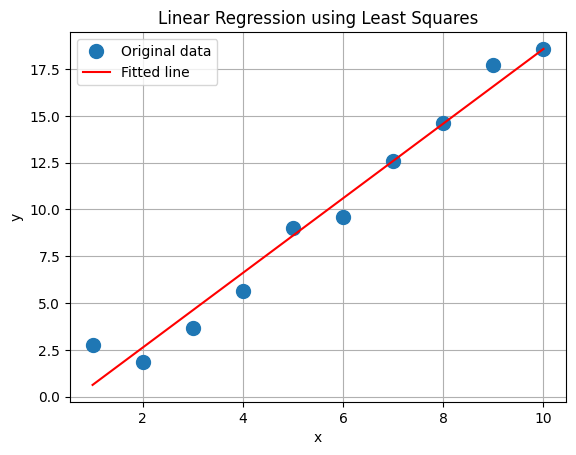

In [231]:
# Plot the original data and fitted line
plt.plot(x, y, 'o', label='Original data', markersize=10)
plt.plot(x, m*x + c, 'r', label='Fitted line')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression using Least Squares')
plt.grid(True)
plt.show()